#  FASHION CLASS CLASSIFICATION

Imprting Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
fashion_train_df = pd.read_csv("fashion-mnist_train.csv")
fashion_test_df = pd.read_csv("fashion-mnist_test.csv")


In [3]:
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
fashion_train_df.shape , fashion_test_df.shape


((60000, 785), (10000, 785))

In [7]:
training = np.array(fashion_train_df , dtype = "float32")
testing = np.array(fashion_test_df , dtype = "float32")


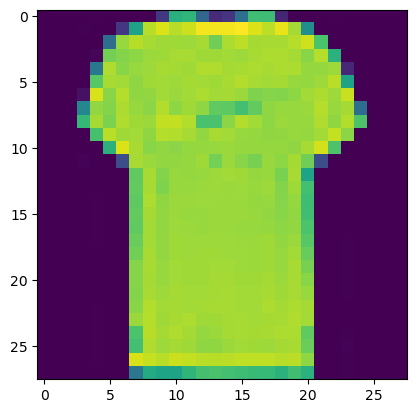

In [8]:
plt.imshow(training[10 , 1:].reshape(28 , 28 ))


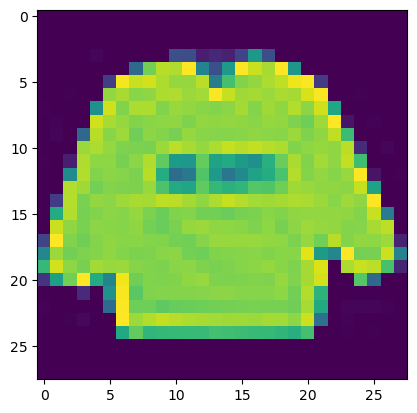

In [9]:
plt.imshow(training[0 , 1: ].reshape(28 , 28))


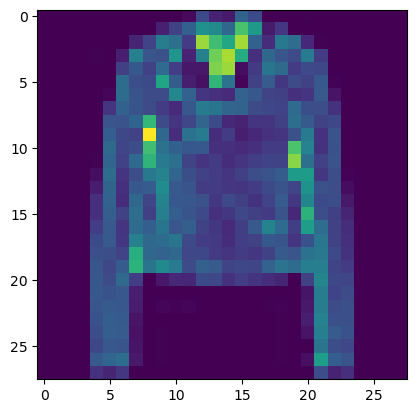

In [10]:
plt.imshow(training[4000 , 1: ].reshape(28 , 28))


In [11]:
import random 


np.float32(7.0)

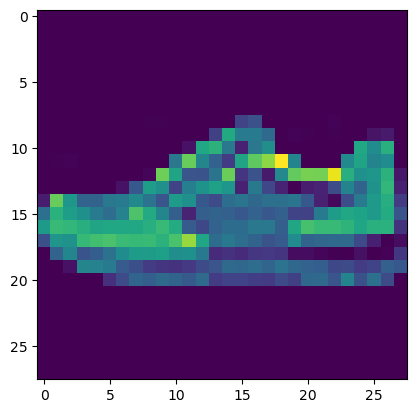

In [12]:
i = random.randint( 1, 6000)
plt.imshow(training[i, 1: ].reshape(28 , 28))
label = training[i, 0]
label


## Remember the 10 classes decoding is as followabs
- 0 is T-shirt/ top
- 1 is trouser
- 2 is pullover
- 3 is dress
- 4 is coat
- 5 is sandal
- 6 is shirt
- 7 is  sneaker
- 8 is bag
- 9 is aakle boot

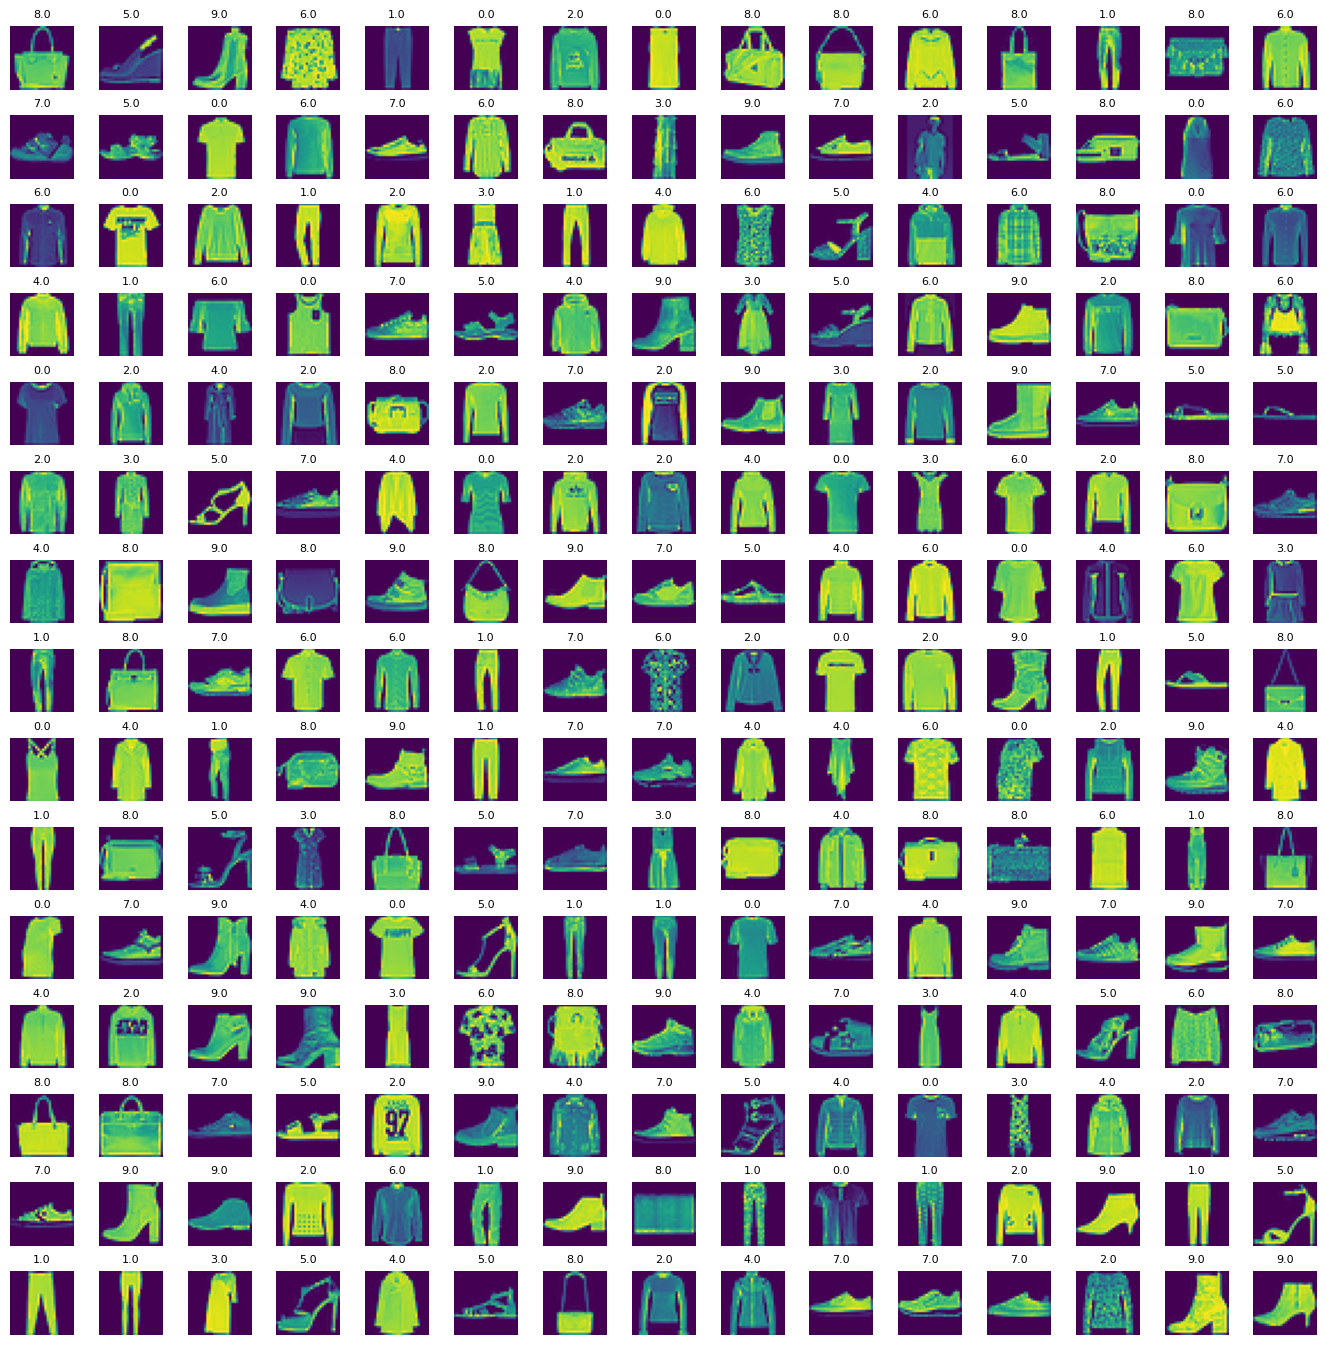

In [13]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize= (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [14]:
 # cnn
# https://adamharley.com/nn_vis/cnn/3d.html


In [15]:
X_train = training[: , 1 :] /255
y_train = training[: , 0]
X_test = testing[: , 1: ] /255
y_test = testing[: , 0]


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train , X_validate , y_train , y_validate = train_test_split(X_train , y_train , test_size= 0.2 , random_state= 12345)


In [18]:
X_train = X_train.reshape(X_train.shape[0], * (28  , 28 , 1))
X_test = X_test.reshape(X_test.shape[0], * (28  , 28 , 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28  , 28 , 1))


In [19]:
X_train.shape


(48000, 28, 28, 1)

In [20]:
X_test.shape


(10000, 28, 28, 1)

In [21]:
X_validate.shape


(12000, 28, 28, 1)

In [44]:
# keras
# !pip install --upgrade keras
# !pip install tensorflow


In [23]:
from tensorflow import keras


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPooling2D ,Dense ,Flatten ,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [25]:
cnn_model = Sequential()


In [26]:
cnn_model.add(Conv2D(32  , 3 , 3 , input_shape = (28 , 28 , 1 ) , activation="relu"))


c:\Users\Crashlar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn_model.add(MaxPooling2D(pool_size = (2 , 2)))


In [28]:
cnn_model.add(Flatten())


In [29]:
cnn_model.add(Dense(units= 32, activation='relu'))


In [30]:
cnn_model.add(Dense(units = 10, activation='sigmoid' ))


In [31]:
cnn_model.compile(loss ="sparse_categorical_crossentropy" , optimizer = Adam(learning_rate = 0.001) , metrics= ['accuracy'])


In [32]:
epochs = 50 


In [33]:
cnn_model.fit(X_train , 
              y_train , 
              batch_size = 512 , 
              epochs = epochs , 
              verbose= 1 ,
             validation_data=(X_validate , y_validate))


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5612 - loss: 1.4021 - val_accuracy: 0.7280 - val_loss: 0.7811
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7500 - loss: 0.6939 - val_accuracy: 0.7692 - val_loss: 0.6339
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7824 - loss: 0.5970 - val_accuracy: 0.7926 - val_loss: 0.5679
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8004 - loss: 0.5449 - val_accuracy: 0.8088 - val_loss: 0.5274
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8130 - loss: 0.5122 - val_accuracy: 0.8207 - val_loss: 0.5006
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8223 - loss: 0.4880 - val_accuracy: 0.8281 - val_loss: 0.4800
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8291 - loss: 0.4702 - val_accuracy: 0.8277 - val_loss: 0.4730
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8332 - loss: 0.4574 - val_accuracy: 0.8380 - v

In [34]:
# evaluation 


In [35]:
evaluation = cnn_model.evaluate(X_test , y_test)
print("Total Accuracy : {:.3f}".format(evaluation[1]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8707 - loss: 0.3569
Total Accuracy : 0.871


In [36]:
predicted_classes  = cnn_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
predicted_classes


array([[9.9982393e-01, 2.4522351e-02, 8.5146070e-01, ..., 3.6557449e-07,
        8.0706996e-01, 2.1512689e-08],
       [2.1884717e-01, 9.9999958e-01, 1.1219169e-02, ..., 2.4143765e-05,
        6.7476824e-02, 6.3791660e-05],
       [9.8257256e-01, 7.7436395e-02, 9.9888766e-01, ..., 6.2527383e-06,
        4.4711851e-02, 6.4380106e-04],
       ...,
       [8.8673346e-03, 3.4184632e-04, 1.9520057e-02, ..., 2.0850775e-01,
        9.9996972e-01, 3.8924741e-03],
       [9.7113949e-01, 4.1306340e-03, 8.9589554e-01, ..., 2.1921440e-05,
        9.9989313e-01, 3.1672607e-04],
       [4.1770706e-01, 9.9804848e-01, 8.5919023e-01, ..., 1.1353882e-06,
        3.8121599e-01, 8.8217075e-04]], dtype=float32)

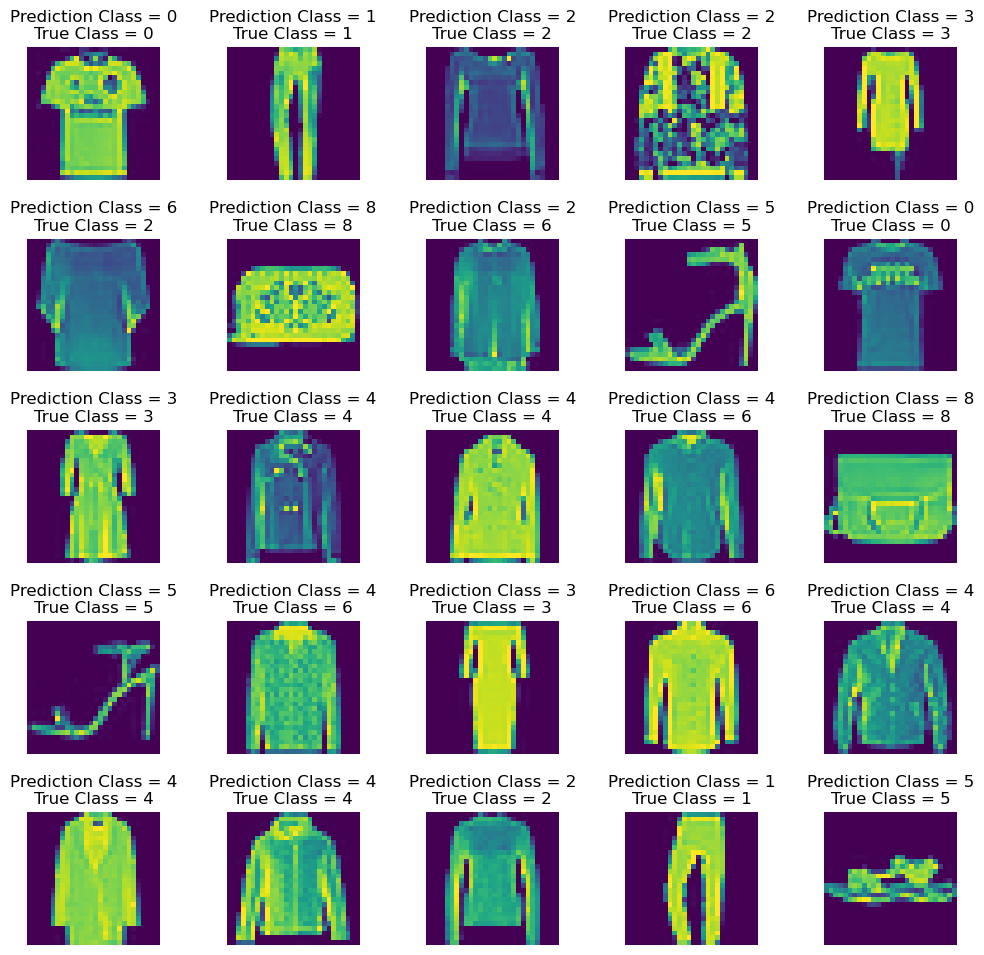

In [38]:
L = 5 
W = 5 
fig , axes = plt.subplots(L , W , figsize = (12 , 12 ))
axes = axes.ravel()

for i in np.arange(0 , L*W):
    axes[i].imshow(X_test[i].reshape(28 , 28 ) )
    # axes[i].set_title("Prediction class = {:0.1f}\n True Class = {.01f}".format(pridicted_classes[i] , y_test[i]))
    # axes.axis('off')
    pred = predicted_classes[i].item() if predicted_classes[i].shape == () or predicted_classes[i].size == 1 else np.argmax(predicted_classes[i])
    true = y_test[i].item() if isinstance(y_test[i], np.ndarray) else int(y_test[i])
    axes[i].set_title(f"Prediction Class = {pred}\nTrue Class = {true}")
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)


In [39]:
# cm = confusion_matrix(y_test , predicted_classes)
# plt.figure(figsize=(14 , 10 ))
# sns.heatmap(cm , annot = True)


In [40]:
from sklearn.metrics import confusion_matrix  , classification_report


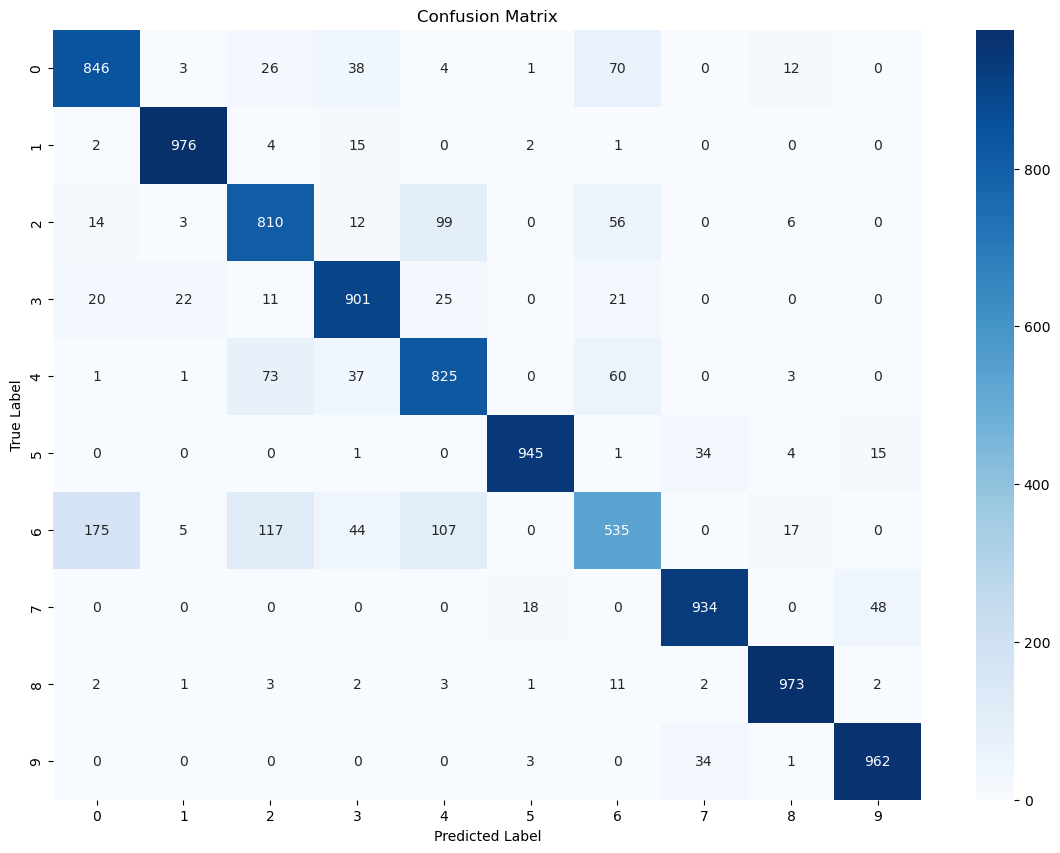

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_classes, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [42]:
# clclassification_report

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predicted_classes, axis=1)


In [43]:
# Define target names
num_classes = 10
target_names = ['Class {}'.format(i) for i in range(num_classes)]

# Generate report
print(classification_report(y_test, predicted_labels, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.80      0.85      0.82      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.78      0.81      0.79      1000
     Class 3       0.86      0.90      0.88      1000
     Class 4       0.78      0.82      0.80      1000
     Class 5       0.97      0.94      0.96      1000
     Class 6       0.71      0.54      0.61      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

